# Perform the Following
- Create a three Qubit and configure them with following distribution
    - $|001\rangle$ has distrbution of 37.5
    - $|011\rangle$ has distrbution of 37.5
    - $|101\rangle$ has distrbution of 12.5
    - $|111\rangle$ has distrbution of 12.5

In [1]:
from qiskit import *
from qiskit.quantum_info import *
from qiskit_aer import *
from qiskit.visualization import *
from math import pi

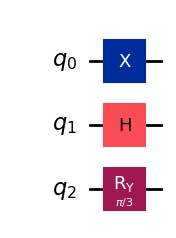

In [2]:
qc = QuantumCircuit(3)
qc.data.clear()
qc.x(0)
qc.h(1)
qc.ry(pi/3,2)
qc.draw('mpl')

In [3]:
#Choosing the backend and executing the ciruit on backend
back = Aer.get_backend('qasm_simulator')
job = back.run(transpile(qc,back),1024).result

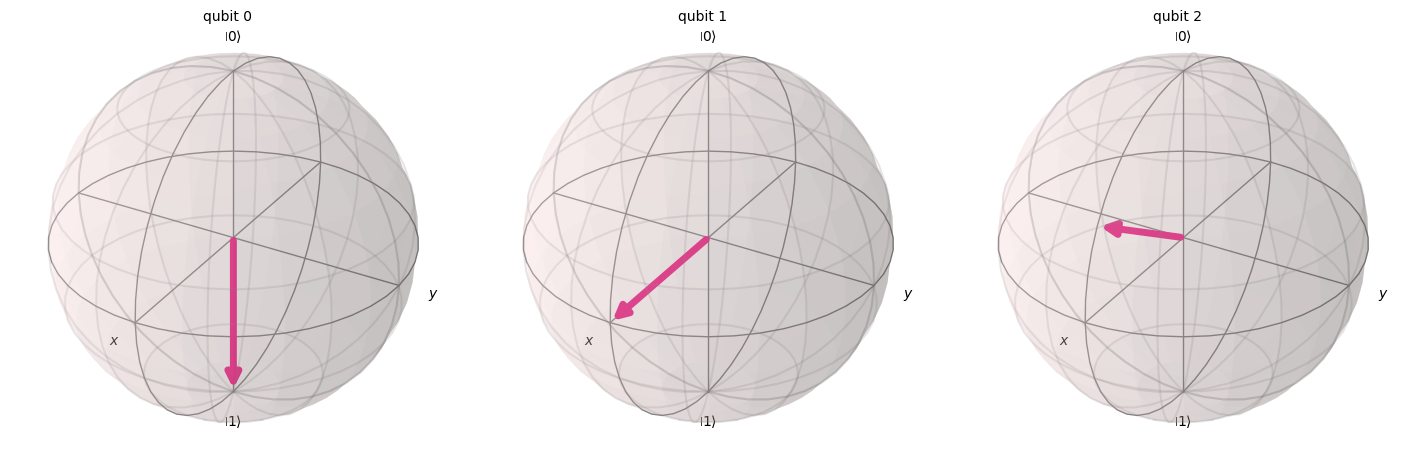

In [4]:
state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)

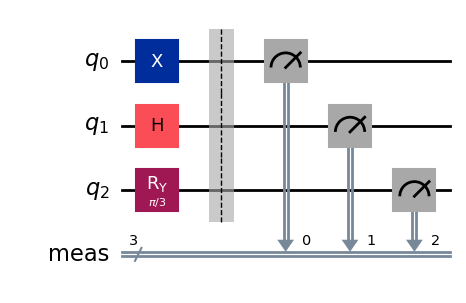

In [5]:
qc.measure_all()
qc.draw(output = 'mpl')

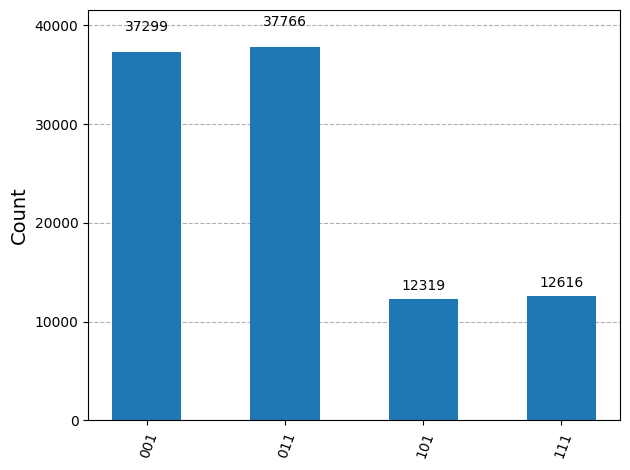

In [9]:
compiled = transpile(qc,back)
job = back.run(compiled, shots = 100000)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)